# How do we ensure that older HDB flats remain important value enhancement assets for Singaporeans?

In [118]:
# Let take a look at the dataset that contains information of resale flats from 2017 onwards

import pandas as pd

# Load dataset

df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [119]:
# Find out details of the dataset

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
94706,2021-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,66 years 04 months,600000.0
94707,2021-03,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,63 years 05 months,593888.0
94708,2021-03,YISHUN,EXECUTIVE,724,YISHUN ST 71,04 TO 06,142.0,Apartment,1986,64 years 05 months,592000.0
94709,2021-03,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,65 years 10 months,630000.0


In [120]:
# Find out more details of the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94711 entries, 0 to 94710
Data columns (total 11 columns):
month                  94711 non-null object
town                   94711 non-null object
flat_type              94711 non-null object
block                  94711 non-null object
street_name            94711 non-null object
storey_range           94711 non-null object
floor_area_sqm         94711 non-null float64
flat_model             94711 non-null object
lease_commence_date    94711 non-null int64
remaining_lease        94711 non-null object
resale_price           94711 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.9+ MB


,floor_area_sqm,lease_commence_date,resale_price
count,94711.000000,94711.000000,9.471100e+04
mean,97.756985,1994.524195,4.461176e+05
std,24.245231,13.112544,1.551782e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.350000e+05
50%,95.000000,1995.000000,4.150000e+05
75%,113.000000,2004.000000,5.230000e+05
max,249.000000,2019.000000,1.258000e+06


# We can see that there are a total of 94711 flats sold in the resale market since 2017.

For the simplicity of this study, we will only consider including the data of resale 4-room flats. This is because this is the type of flat that has the most demand, and therefore better represent the overall demand of resale flats in Singapore. 

In [121]:
# Let's extract information of 4-room resale flats sold since 2017 from the dataset

df2 = df[df['flat_type']=='4 ROOM']

print(df2)

         month        town flat_type block        street_name storey_range  \
33     2017-01  ANG MO KIO    4 ROOM   472  ANG MO KIO AVE 10     10 TO 12   
34     2017-01  ANG MO KIO    4 ROOM   475  ANG MO KIO AVE 10     07 TO 09   
35     2017-01  ANG MO KIO    4 ROOM   629   ANG MO KIO AVE 4     01 TO 03   
36     2017-01  ANG MO KIO    4 ROOM   546  ANG MO KIO AVE 10     01 TO 03   
37     2017-01  ANG MO KIO    4 ROOM   131   ANG MO KIO AVE 3     01 TO 03   
...        ...         ...       ...   ...                ...          ...   
94672  2021-03      YISHUN    4 ROOM   738       YISHUN ST 72     04 TO 06   
94673  2021-03      YISHUN    4 ROOM   749       YISHUN ST 72     04 TO 06   
94674  2021-03      YISHUN    4 ROOM   873       YISHUN ST 81     01 TO 03   
94675  2021-03      YISHUN    4 ROOM   866       YISHUN ST 81     01 TO 03   
94676  2021-03      YISHUN    4 ROOM   868       YISHUN ST 81     10 TO 12   

       floor_area_sqm      flat_model  lease_commence_date  \
3

# From the dataset above, we know there are a total of 39240 4-room resale flats sold from 2017 onwards

In [122]:
# Let's find out if there is a correlation between between resale flat prices and their remaining lease

# Let's create a new column for the remaining leases of the resale flats in years

df2['remaining_lease_year']=99-(2020-df2['lease_commence_date'])

print(df2)

# We will extract the 'remaining_lease_year' and 'resale_price' columns from the dataset above to find out

df3 = df2.loc[:, ['remaining_lease_year', 'resale_price']]

print(df3)


         month        town flat_type block        street_name storey_range  \
33     2017-01  ANG MO KIO    4 ROOM   472  ANG MO KIO AVE 10     10 TO 12   
34     2017-01  ANG MO KIO    4 ROOM   475  ANG MO KIO AVE 10     07 TO 09   
35     2017-01  ANG MO KIO    4 ROOM   629   ANG MO KIO AVE 4     01 TO 03   
36     2017-01  ANG MO KIO    4 ROOM   546  ANG MO KIO AVE 10     01 TO 03   
37     2017-01  ANG MO KIO    4 ROOM   131   ANG MO KIO AVE 3     01 TO 03   
...        ...         ...       ...   ...                ...          ...   
94672  2021-03      YISHUN    4 ROOM   738       YISHUN ST 72     04 TO 06   
94673  2021-03      YISHUN    4 ROOM   749       YISHUN ST 72     04 TO 06   
94674  2021-03      YISHUN    4 ROOM   873       YISHUN ST 81     01 TO 03   
94675  2021-03      YISHUN    4 ROOM   866       YISHUN ST 81     01 TO 03   
94676  2021-03      YISHUN    4 ROOM   868       YISHUN ST 81     10 TO 12   

       floor_area_sqm      flat_model  lease_commence_date  \
3

C:\Users\anghe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


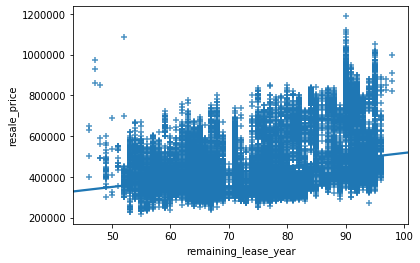

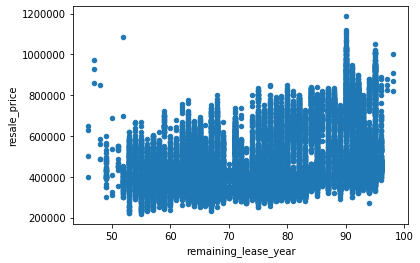

In [123]:
# With the dataset above containing the 'remaining_lease' and 'resale_price' columns, let's plot a scatterplot and a regression graph to see their relationship

# Scatterplot and regression plot using seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='remaining_lease_year', y='resale_price', data=df3, marker='+')

ax=df3.plot.scatter(x='remaining_lease_year', y='resale_price')

plt.show()

# Based on the regression graph above, it does show an overall positive correlation between resale price and remaining lease of the 4-room flats

This is indeed a worrying trend, given that many Singaporeans have high hopes of cashing out from their HDB flats for retirement when they reach old age. 

Hence, it is crucial for the government to study factors that can help slow the effect of lease decay, or to retain the value of the HDB flats.

In [124]:
# Let's compare the prices of 4-room resale flats in Ang Mo Kio, Bedok and Clementi, towns which has a combination of flats which reach their "minimum occupation period", and those which are over 40 years old.

# Select 4-room resale flats in Ang Mo Kio with 55 remaining years of lease or less

df4 = df2[df2['town']=='ANG MO KIO']

df5 = df4[df4['remaining_lease_year']<60]
print(df5)


         month        town flat_type block        street_name storey_range  \
33     2017-01  ANG MO KIO    4 ROOM   472  ANG MO KIO AVE 10     10 TO 12   
34     2017-01  ANG MO KIO    4 ROOM   475  ANG MO KIO AVE 10     07 TO 09   
37     2017-01  ANG MO KIO    4 ROOM   131   ANG MO KIO AVE 3     01 TO 03   
38     2017-01  ANG MO KIO    4 ROOM   254   ANG MO KIO AVE 4     04 TO 06   
39     2017-01  ANG MO KIO    4 ROOM   470  ANG MO KIO AVE 10     04 TO 06   
...        ...         ...       ...   ...                ...          ...   
92322  2021-03  ANG MO KIO    4 ROOM   229   ANG MO KIO AVE 3     07 TO 09   
92323  2021-03  ANG MO KIO    4 ROOM   572   ANG MO KIO AVE 3     04 TO 06   
92324  2021-03  ANG MO KIO    4 ROOM   114   ANG MO KIO AVE 4     01 TO 03   
92325  2021-03  ANG MO KIO    4 ROOM   254   ANG MO KIO AVE 4     10 TO 12   
92328  2021-03  ANG MO KIO    4 ROOM   105   ANG MO KIO AVE 4     07 TO 09   

       floor_area_sqm      flat_model  lease_commence_date  \
3

In [125]:
# Select 4-room resale flats in Ang Mo Kio which has at least 90 years of remaining lease left

df6 = df4[df4['remaining_lease_year']>=90]

print(df6)

         month        town flat_type block       street_name storey_range  \
46     2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47     2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48     2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
2342   2017-03  ANG MO KIO    4 ROOM  307C  ANG MO KIO AVE 1     16 TO 18   
2343   2017-03  ANG MO KIO    4 ROOM  588A  ANG MO KIO ST 52     07 TO 09   
...        ...         ...       ...   ...               ...          ...   
90171  2021-02  ANG MO KIO    4 ROOM  588B  ANG MO KIO ST 52     22 TO 24   
92314  2021-03  ANG MO KIO    4 ROOM  307A  ANG MO KIO AVE 1     07 TO 09   
92315  2021-03  ANG MO KIO    4 ROOM  307B  ANG MO KIO AVE 1     04 TO 06   
92332  2021-03  ANG MO KIO    4 ROOM  588B  ANG MO KIO ST 52     01 TO 03   
92334  2021-03  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     13 TO 15   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  

In [126]:
# Let's compare the median prices of the resale 4-room HDB flats between these two groups in Ang Mo Kio

print(df5['resale_price'].median()) # median price of 4-room resale HDB flat in Ang Mo Kio with remaining lease of less than 60

print(df6['resale_price'].median()) # median price of 4-room resale HDB flat in Ang Mo Kio with remaining lease of more than 90 years



410000.0
679000.0


In [127]:
# Select 4-room resale flats in Bedok with remaining lease of less than 60 years

df7 = df2[df2['town']=='BEDOK']

df8 = df7[df7['remaining_lease_year']<60]

print(df8)

         month   town flat_type block         street_name storey_range  \
89     2017-01  BEDOK    4 ROOM    35     BEDOK STH AVE 2     13 TO 15   
90     2017-01  BEDOK    4 ROOM    42        BEDOK STH RD     04 TO 06   
91     2017-01  BEDOK    4 ROOM    34     BEDOK STH AVE 2     10 TO 12   
92     2017-01  BEDOK    4 ROOM     7     BEDOK STH AVE 2     04 TO 06   
93     2017-01  BEDOK    4 ROOM     8     BEDOK STH AVE 2     13 TO 15   
...        ...    ...       ...   ...                 ...          ...   
92417  2021-03  BEDOK    4 ROOM    80        BEDOK NTH RD     07 TO 09   
92422  2021-03  BEDOK    4 ROOM   126      BEDOK NTH ST 2     07 TO 09   
92430  2021-03  BEDOK    4 ROOM   701  BEDOK RESERVOIR RD     10 TO 12   
92441  2021-03  BEDOK    4 ROOM    35     BEDOK STH AVE 2     13 TO 15   
92442  2021-03  BEDOK    4 ROOM     5     BEDOK STH AVE 2     01 TO 03   

       floor_area_sqm      flat_model  lease_commence_date  \
89               90.0        Improved            

In [128]:
# Select 4-room resale flats in Bedok which has at least 90 years of remaining lease left

df9 = df7[df7['remaining_lease_year']>=90]

print(df9)

         month   town flat_type block           street_name storey_range  \
60623  2019-11  BEDOK    4 ROOM  748C  BEDOK RESERVOIR CRES     13 TO 15   
62544  2019-12  BEDOK    4 ROOM  747B  BEDOK RESERVOIR CRES     07 TO 09   
64397  2020-01  BEDOK    4 ROOM  748B  BEDOK RESERVOIR CRES     13 TO 15   
64398  2020-01  BEDOK    4 ROOM  747C  BEDOK RESERVOIR CRES     10 TO 12   
64399  2020-01  BEDOK    4 ROOM  748B  BEDOK RESERVOIR CRES     13 TO 15   
...        ...    ...       ...   ...                   ...          ...   
92448  2021-03  BEDOK    4 ROOM  807B          CHAI CHEE RD     07 TO 09   
92449  2021-03  BEDOK    4 ROOM  808A          CHAI CHEE RD     13 TO 15   
92450  2021-03  BEDOK    4 ROOM  807A          CHAI CHEE RD     10 TO 12   
92451  2021-03  BEDOK    4 ROOM  807B          CHAI CHEE RD     04 TO 06   
92452  2021-03  BEDOK    4 ROOM  807A          CHAI CHEE RD     01 TO 03   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
60623     

In [129]:
# Let's compare the median prices of the resale 4-room HDB flats between these two groups in Bedok

print(df8['resale_price'].median()) # median price of 4-room resale HDB flat in Bedok with remaining lease of less than 60 years

print(df9['resale_price'].median()) # median price of 4-room resale HDB flat in Bedok with remaining lease of more than 90 years



380000.0
642000.0


In [130]:
# Let's compare the prices of 4-room resale flats in Clementi, towns which has a combination of flats which reach their "minimum occupation period", and those which are over 40 years old.

# Select 4-room resale flats in Clementi with remaining lease of less than 60 years

df10 = df2[df2['town']=='CLEMENTI']

df11 = df10[df10['remaining_lease_year']<60]

print(df11)

         month      town flat_type block         street_name storey_range  \
371    2017-01  CLEMENTI    4 ROOM   730  CLEMENTI WEST ST 2     01 TO 03   
373    2017-01  CLEMENTI    4 ROOM   709  CLEMENTI WEST ST 2     04 TO 06   
376    2017-01  CLEMENTI    4 ROOM   348      CLEMENTI AVE 5     01 TO 03   
377    2017-01  CLEMENTI    4 ROOM   411   C'WEALTH AVE WEST     10 TO 12   
378    2017-01  CLEMENTI    4 ROOM   324      CLEMENTI AVE 5     04 TO 06   
...        ...       ...       ...   ...                 ...          ...   
92981  2021-03  CLEMENTI    4 ROOM   434      CLEMENTI AVE 3     10 TO 12   
92983  2021-03  CLEMENTI    4 ROOM   302      CLEMENTI AVE 4     01 TO 03   
92991  2021-03  CLEMENTI    4 ROOM   607  CLEMENTI WEST ST 1     07 TO 09   
92992  2021-03  CLEMENTI    4 ROOM   708  CLEMENTI WEST ST 2     01 TO 03   
92995  2021-03  CLEMENTI    4 ROOM   506       WEST COAST DR     01 TO 03   

       floor_area_sqm      flat_model  lease_commence_date  \
371          

In [131]:
# Select 4-room resale flats in Clementi which has at least 90 years of remaining lease left

df12 = df10[df10['remaining_lease_year']>=90]

print(df12)

         month      town flat_type block     street_name storey_range  \
1511   2017-02  CLEMENTI    4 ROOM   418  CLEMENTI AVE 1     04 TO 06   
2825   2017-03  CLEMENTI    4 ROOM   421  CLEMENTI AVE 1     16 TO 18   
2826   2017-03  CLEMENTI    4 ROOM   424  CLEMENTI AVE 1     19 TO 21   
2827   2017-03  CLEMENTI    4 ROOM   418  CLEMENTI AVE 1     19 TO 21   
4742   2017-04  CLEMENTI    4 ROOM   420  CLEMENTI AVE 1     04 TO 06   
...        ...       ...       ...   ...             ...          ...   
92982  2021-03  CLEMENTI    4 ROOM  311C  CLEMENTI AVE 4     31 TO 33   
92984  2021-03  CLEMENTI    4 ROOM  311B  CLEMENTI AVE 4     28 TO 30   
92986  2021-03  CLEMENTI    4 ROOM  311B  CLEMENTI AVE 4     40 TO 42   
92987  2021-03  CLEMENTI    4 ROOM  311B  CLEMENTI AVE 4     16 TO 18   
92988  2021-03  CLEMENTI    4 ROOM  311B  CLEMENTI AVE 4     22 TO 24   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
1511            100.0    Model A              

In [132]:
# Let's compare the median prices of the resale 4-room HDB flats between these two groups in Clementi

print(df11['resale_price'].median()) # median price of 4-room resale HDB flat in Clementi with remaining lease of less than 60 years

print(df12['resale_price'].median()) # median price of 4-room resale HDB flat in Clementi with remaining lease of more than 90 years



438800.0
730000.0


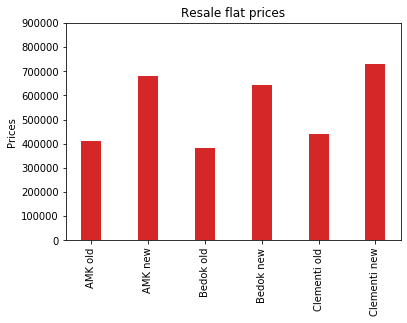

In [133]:
# Let's plot a bar graph to see the resale prices of the newer and older 4 room flats in Ang Mo Kio, Bedok and Clementi

flats = np.arange(6)
prices = (410000, 679000, 380000, 642000, 438800, 730000)
width = 0.35
p1t = plt.bar(flats, prices, width, color='#d62728')

plt.ylabel('Prices')
plt.title('Resale flat prices')
plt.xticks(flats, ('AMK old', 'AMK new', 'Bedok old', 'Bedok new', 'Clementi old', 'Clementi new'), rotation=90)
plt.yticks(np.arange(0, 1000000, 100000))

plt.show()



# Based on the bar graph above, it seems that the market value of 4-room resale HDB flats which has remaining leases of 60 years or less can be close to 40% lower than those with remaining leases of 90 years or more.

Let's us now check if those resale flats which are near MRT stations or integrated transport hub have higher market value than those which are further away.



In [134]:
# We will study the example of Ang Mo Kio and Bedok, comparing the prices between resale 4-room flats with leases less than 60 years, and located 0.5km from and those located outside the 0.5km radius from their town's MRT station/integrated transport hub. 

# For Ang Mo Kio, we will take the examples of the resale prices of 4 room flats for blocks 333 and 152, where the first two blocks are 0.5km away and the latter two outside the 0.5km radius.

# For Bedok, we will take the the examples of the resale prices of 4 room flats for blocks 411, and 71, where the first two blocks are 0.5km away and the latter two outside the 0.5km radius.

# For Ang Mo Kio

df13 = df4[df4['block']=='333'] 

df14 = df4[df4['block']=='152']

print(df13['resale_price'].median()) # Median resale price for a 4-room unit which is 0.5km away from Ang Mo Kio MRT

print(df14['resale_price'].median()) # Median resale price for a 4-room unit which is more than 0.5km away from Ang Mo Kio MRT

400000.0
320000.0


In [135]:
# For Bedok 

df15 = df4[df4['block']=='411']

df16 = df4[df4['block']=='71']

print(df13['resale_price'].median()) # Median resale price for a 4-room unit which is 0.5km away from Bedok MRT

print(df14['resale_price'].median()) # Median resale price for a 4-room unit which is more than 0.5km away from Bedok MRT

400000.0
320000.0


# From the examples above, we can see that the "MRT" premium can enhance the resale value of up to 25%

In [136]:
# Let's plot a multiple regression to find out how the value of resale 4-room flat correlates with remaining_lease_year and floor_area_sqm

X = df2[['remaining_lease_year', 'floor_area_sqm']]
y= df2['resale_price']

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[3338.65196276   56.06584019]


# Let's examine the trend of prices since 1990 of resale flats built in 1979 or earlier 


In [137]:
# Load dataset

df17 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')

df18 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')

df19 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

df20 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')

df60 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

frames = [df17, df18, df19, df20, df60]

result = pd.concat(frames)

C:\Users\anghe\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [138]:
print(result)

      block        flat_model         flat_type  floor_area_sqm  \
0       309          IMPROVED            1 ROOM            31.0   
1       309          IMPROVED            1 ROOM            31.0   
2       309          IMPROVED            1 ROOM            31.0   
3       309          IMPROVED            1 ROOM            31.0   
4       216    NEW GENERATION            3 ROOM            73.0   
...     ...               ...               ...             ...   
94706   360         Apartment         EXECUTIVE           142.0   
94707   277        Maisonette         EXECUTIVE           146.0   
94708   724         Apartment         EXECUTIVE           142.0   
94709   828        Maisonette         EXECUTIVE           146.0   
94710   633  Multi Generation  MULTI-GENERATION           171.0   

       lease_commence_date    month     remaining_lease  resale_price  \
0                     1977  1990-01                 NaN        9000.0   
1                     1977  1990-01              

In [139]:
# Extract 4-room flats with lease_commence_date from 1979 and before, together with their resale prices

df21 = result[result['lease_commence_date']<=1979] # Extract 4-room flats with lease commence date from 1979 and before

df22 = df21[df21['flat_type']=='4 ROOM']

print(df22)

df23 = df22[['month',  'resale_price']]

print(df23)

df23.groupby('month').resale_price.median()



      block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
104     211  NEW GENERATION    4 ROOM            81.0                 1977   
105     209  NEW GENERATION    4 ROOM            91.0                 1977   
106     231  NEW GENERATION    4 ROOM            92.0                 1977   
107     308  NEW GENERATION    4 ROOM            92.0                 1976   
108     254  NEW GENERATION    4 ROOM            97.0                 1977   
...     ...             ...       ...             ...                  ...   
94399   200        Improved    4 ROOM            87.0                 1973   
94437    22  New Generation    4 ROOM            92.0                 1977   
94438    29  New Generation    4 ROOM            97.0                 1979   
94439    25  New Generation    4 ROOM            91.0                 1977   
94440    27  New Generation    4 ROOM            91.0                 1977   

         month     remaining_lease  resale_price storey_range  

month
1990-01     71400.0
1990-02     71400.0
1990-03     71600.0
1990-04     75000.0
1990-05     72000.0
             ...   
2020-11    397000.0
2020-12    405000.0
2021-01    418000.0
2021-02    405000.0
2021-03    423400.0
Name: resale_price, Length: 375, dtype: float64

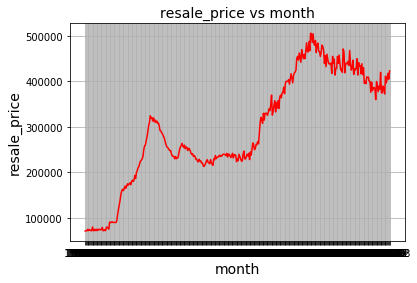

In [167]:
# Plot line graph to show the trend of 4-room resale flats built in 1979 and before

plt.plot(df23.groupby('month').resale_price.median(), color='red')
plt.title('resale_price vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale_price', fontsize=14)
plt.grid(True)
plt.show()


In [141]:
# Extract 4-room flats with lease_commence_date from 1980 onwards, together with their resale prices

df24 = result[result['lease_commence_date']>=1980] # Extract 4-room flats with lease commence date from 1979 and before

df25 = df24[df24['flat_type']=='4 ROOM']

print(df25)

df26 = df25[['month',  'resale_price']]

print(df25)

df26.groupby('month').resale_price.median()

      block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
123     473  NEW GENERATION    4 ROOM            91.0                 1984   
126     456  NEW GENERATION    4 ROOM           100.0                 1980   
127     544  NEW GENERATION    4 ROOM            92.0                 1981   
128     640  NEW GENERATION    4 ROOM            91.0                 1980   
129     638  NEW GENERATION    4 ROOM            91.0                 1980   
...     ...             ...       ...             ...                  ...   
94672   738  New Generation    4 ROOM            92.0                 1985   
94673   749  New Generation    4 ROOM            91.0                 1984   
94674   873         Model A    4 ROOM           104.0                 1988   
94675   866         Model A    4 ROOM           104.0                 1988   
94676   868         Model A    4 ROOM           104.0                 1987   

         month     remaining_lease  resale_price storey_range  

month
1990-01     83000.0
1990-02     87000.0
1990-03     83500.0
1990-04     85550.0
1990-05     86000.0
             ...   
2020-11    435000.0
2020-12    440000.0
2021-01    450000.0
2021-02    450000.0
2021-03    458000.0
Name: resale_price, Length: 375, dtype: float64

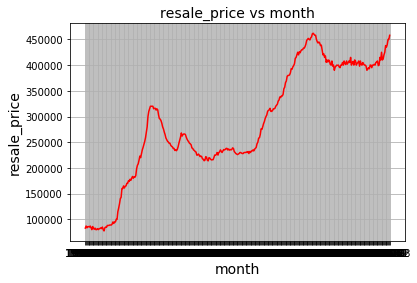

In [168]:
# Plot line graph to show the trend of 4-room resale flats built in 1980 and after

plt.plot(df26.groupby('month').resale_price.median(), color='red')
plt.title('resale_price vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale_price', fontsize=14)
plt.grid(True)
plt.show()

In [143]:
# Let's get the overall picture of HDB flats

#load dataset

df27 = pd.read_csv('hdb-property-information.csv')

df27.head()


,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0


In [144]:
# Sort the dataset 

df27.sort_values('year_completed')

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
8921,60,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
10609,72,SENG POH RD,3,1937,Y,N,N,N,N,N,...,15,7,0,0,0,0,0,0,0,0
10393,70,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
10690,73,ENG WATT ST,3,1937,Y,N,N,N,N,N,...,8,34,0,0,0,0,0,0,0,0
9258,62,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,154,BEDOK STH RD,7,2021,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
1726,153C,BEDOK STH RD,18,2021,Y,N,N,N,N,N,...,0,83,34,0,0,0,0,0,0,0
1725,153B,BEDOK STH RD,18,2021,Y,N,N,N,N,N,...,0,32,68,0,0,0,0,0,0,0
7257,467C,BT BATOK WEST AVE 9,18,2021,Y,N,N,N,N,N,...,34,0,0,0,0,0,0,0,0,0


In [145]:
# Remove rows which are not relevant for the study

df28 = df27.drop(['blk_no', 'street', 'max_floor_lvl', 'commercial', 'market_hawker'], axis=1) 
                   
df29 = df28.drop(['multistorey_carpark', 'precinct_pavilion', '1room_rental', '2room_rental', 'miscellaneous'], axis=1)

df30 = df29.drop(['3room_rental', 'other_room_rental'], axis=1)

print(df30)

       year_completed residential bldg_contract_town  total_dwelling_units  \
0                1970           Y                KWN                   142   
1                1975           Y                 BD                   206   
2                2010           N                 CT                     0   
3                1982           Y                 BD                   102   
4                1975           Y                PRC                    55   
...               ...         ...                ...                   ...   
12340            2018           Y                 HG                   185   
12341            2018           Y                 HG                   174   
12342            2018           N                 HG                     0   
12343            2018           Y                 HG                   306   
12344            2018           Y                 HG                   126   

       1room_sold  2room_sold  3room_sold  4room_sold  5room_so

In [146]:
df31 = df30.sort_values('year_completed')

df32 = df31[df31['year_completed']>=1960]

df33 = df32[df32['residential']=='Y']

print(df33)

      year_completed residential bldg_contract_town  total_dwelling_units  \
1439            1961           Y                 GL                   120   
848             1961           Y                 GL                   119   
7448            1961           Y                 QT                   112   
1183            1961           Y                 GL                   120   
6957            1961           Y                 QT                   112   
...              ...         ...                ...                   ...   
1743            2021           Y                 BD                   153   
1726            2021           Y                 BD                   117   
1725            2021           Y                 BD                   100   
7257            2021           Y                 BB                   221   
5891            2021           Y                 HG                   136   

      1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold

In [147]:
# Total HDB dwelling units today

df33['total_dwelling_units'].sum()

1081036

In [148]:
# Total number of HDB dwelling units that are more than 40 years old (i.e. those built in 1980 and before)

df34 = df33[df33['year_completed']<=1980]

df34['total_dwelling_units'].sum()

245957

In [149]:
# Total number of HDB dwelling units that are more than 40 years old in 2031 (i.e. those built in 1980 and before)

df35 = df33[df33['year_completed']<=1990]

df35['total_dwelling_units'].sum()

542704

In [150]:
# Total number of HDB dwelling units that are more than 40 years old in 2041 (i.e. those built in 1980 and before)

df36 = df33[df33['year_completed']<=2000]

df36['total_dwelling_units'].sum()

795676

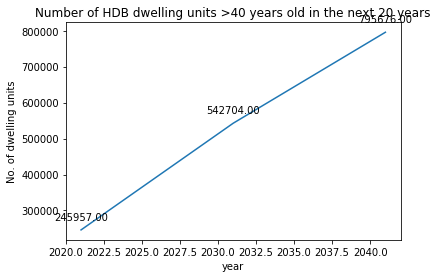

In [151]:
# Plot line graph of the number of dwelling units that are more than 40 years old over the next two decades 

year = [2021, 2031, 2041]

HDB_units_over_40years = [245957, 542704, 795676]

plt.plot(year, HDB_units_over_40years)
plt.title('Number of HDB dwelling units >40 years old in the next 20 years')
plt.xlabel('year')
plt.ylabel('No. of dwelling units')

# zip joins x and y coordinates in pairs
for x, y in zip(year, HDB_units_over_40years):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [152]:
# Number of pioneer generation: a Singaporean born on or before 31 December 1949 and obtained citizenship before 31 December 1986. 450,000 of them. 

# Number of Mederka generation: a Singaporean born in the 1950s. 500,000 of them.   

# Most of the flats bought by pioneer generation and Mederka generation are those built before 2000. Let's get the total stock of these flats.

df37 = df33[df33['year_completed']<2000]

df37['total_dwelling_units'].sum()

767915

In [153]:
# Government can consider taking back old HDB flats in phases in next 20, 30 and 40 years time

df34['total_dwelling_units'].sum() # Those built in 1980 and before, which may be recovered in 20 years time



245957

In [154]:
df35['total_dwelling_units'].sum() - df34['total_dwelling_units'].sum() # Those built between 1981 and 1990, which may be recovered in 30 years time



296747

In [155]:
df36['total_dwelling_units'].sum() - df35['total_dwelling_units'].sum() - df34['total_dwelling_units'].sum() # Those built between 1981 and 1990, which may be recovered in 40 years time


7015

In [156]:
# Check if there is any difference for HDB 4-room resale flats between mature and non-mature estates

# Extract HDB 4-Room resale flats from HDB's records

df38 = result[result['flat_type']=='4 ROOM']

# Create a dataframe for mature estates
mature = df38[df38['town'].isin(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH'])]
                     
# Create a dataframe for non-mature estates    
non_mature = df38[df38['town'].isin(['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'PUNGGOL', 'SEMBAWANG', 'SENGKANG', 'WOOODLANDS', 'YISHUN'])]

# Find out the median resale prices of 4-room flats in mature estates with less than 60 years' lease remaining

mature1 = mature[mature['lease_commence_date']<=1980] # Extract 4-room flats with lease commence date from 1981 and before

mature2 = mature1[['month',  'resale_price']]

mature2.groupby('month').resale_price.median()

# Find out the median resale prices of 4-room flats in non-mature estates with less than 60 years' lease remaining

non_mature1 = mature[mature['lease_commence_date']>1980] # Extract 4-room flats with lease commence date from 1981 and before

non_mature2 = non_mature1[['month',  'resale_price']]

non_mature2.groupby('month').resale_price.median()


month
1990-01     88000.0
1990-02     90000.0
1990-03     89000.0
1990-04     88000.0
1990-05     91000.0
             ...   
2020-11    525000.0
2020-12    530000.0
2021-01    530000.0
2021-02    555000.0
2021-03    565000.0
Name: resale_price, Length: 375, dtype: float64

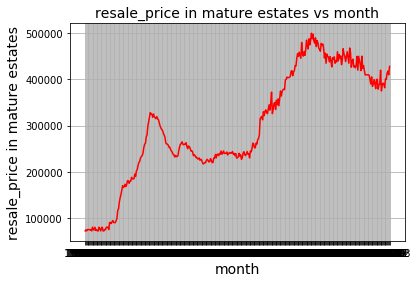

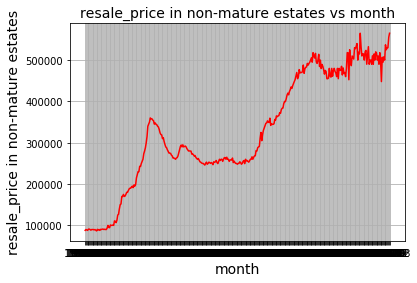

In [170]:
# Plot line graph to show the trend of 4-room resale flats in mature estates built in 1980 or earlier
plt.plot(mature2.groupby('month').resale_price.median(), color='red')
plt.title('resale_price in mature estates vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale_price in mature estates', fontsize=14)
plt.grid(True)
plt.show()

# Plot line graph to show the trend of 4-room resale flats in non-mature estates built in 1980 or earlier

plt.plot(non_mature2.groupby('month').resale_price.median(), color='red')
plt.title('resale_price in non-mature estates vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale_price in non-mature estates', fontsize=14)
plt.grid(True)
plt.show()

# The huge increase in resale prices in non-mature estates is greater than those in mature estates

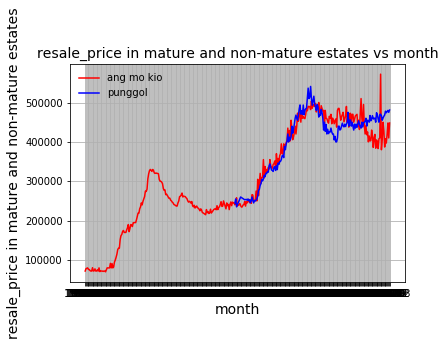

In [171]:
# Let's examine the trend of resale prices in Ang Mo Kio (mature estate) and Punggol (non-mature estate)

ang_mo_kio = df38[df38['town']=='ANG MO KIO']

ang_mo_kio2 = ang_mo_kio[['month',  'resale_price']]

ang_mo_kio2.groupby('month').resale_price.median()

punggol = df38[df38['town']=='PUNGGOL']

punggol2 = punggol[['month',  'resale_price']]

punggol2.groupby('month').resale_price.median()

# Plot line graph to show the trend of resale prices in Ang Mo Kio (mature estate) and Punggol (non-mature estate)

plt.plot(ang_mo_kio2.groupby('month').resale_price.median(), label= 'ang mo kio', color='red')
plt.plot(punggol2.groupby('month').resale_price.median(), label= 'punggol', color='blue')
plt.title('resale_price in mature and non-mature estates vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale_price in mature and non-mature estates', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

In [159]:
# Let's check the median resale prices of four-room flats in 2020 with less than 60 years' lease remaining in mature and non-mature estates

# Mature estates

df39=mature2.groupby('month').resale_price.median()

df40=df39.tail(15)

df41=df40.head(12)

print(df41.median())

# Non-mature estates

df42=non_mature2.groupby('month').resale_price.median()

df43=df42.tail(15)

df44=df43.head(12)

print(df44.median())


390000.0
507500.0


# Let's find out the effect of new MRT lines on resale HDB flats

Timeline of Downtown Line:

2001 - Announcement of the development of three new MRT lines, two of which are part of today's Downtown Line - the Bukit Timah Line and northern part of the Eastern Region Line. 

2005 - LTA announced the Downtown Extension, serving the Marina Bay Area. 

2007 - Annoucement of the development of Downtown Line in three stages streching 40km with 33 stations. 

Stage 1: Stretching 4.3km started construction in January 2008 at Chinatown station. It began service on 22 December 2013.

Stage 2: 16.6km long with 12 stations connecting Bukit Panjang and Rochor stations. Construction begain on 3 July 2009.

Stage 3: Goes from Chinatown to Expo. Station locations and finalised route unveiled on 20 August 2010. It is 21km long and serve 16 stations. The route opened on 21 October 2017.

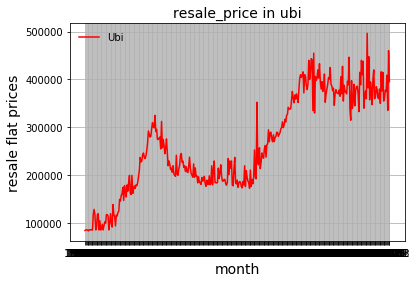

In [172]:
# Let's find out the trend of resale 4-room flat prices of Ubi and Kaki Bukit, from 1990 onwards

# Get the dataset for resale 4-room flats in Ubi and Kaki Bukit from 1990 onwards

# Ubi resale 4-room flats

df45 = result[result['street_name']=='UBI AVE 1']

ubi = df45[['month',  'resale_price']]

ubi.groupby('month').resale_price.median()

# Kaki Bukit resale 4-room flats

df46 = result[result['street_name']=='JLN TENAGA']

kaki_bukit = df45[['month',  'resale_price']]

kaki_bukit.groupby('month').resale_price.median()

# Plot line graph to show the trend of resale prices in Ubi and Kaki Bukit

plt.plot(ubi.groupby('month').resale_price.median(), label= 'Ubi', color='red')

plt.title('resale_price in ubi', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

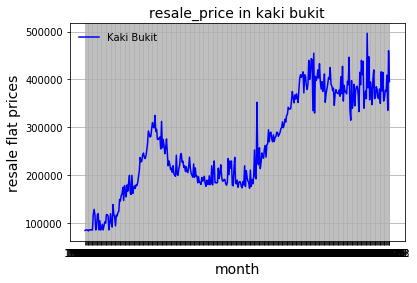

In [173]:
plt.plot(kaki_bukit.groupby('month').resale_price.median(), label= 'Kaki Bukit', color='blue')

plt.title('resale_price in kaki bukit', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

C:\Users\anghe\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


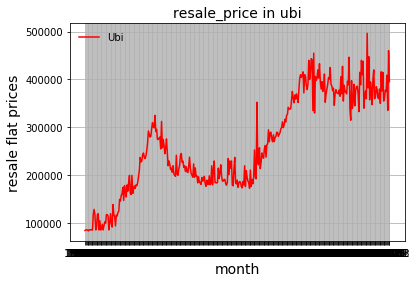

In [174]:
# Let's find out the trend of resale 4-room flat prices of Ubi and Kaki Bukit, from 2000 onwards

# Get the dataset for resale 4-room flats in Ubi and Kaki Bukit from 1990 onwards

df18 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')

df19 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

df20 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')

df60 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

frames1 = [df18, df19, df20, df60]

result1 = pd.concat(frames)

# Ubi resale 4-room flats

df47 = result1[result1['street_name']=='UBI AVE 1']

ubi1 = df47[['month',  'resale_price']]

ubi1.groupby('month').resale_price.median()

# Kaki Bukit resale 4-room flats

df48 = result1[result1['street_name']=='JLN TENAGA']

kaki_bukit1 = df48[['month',  'resale_price']]

kaki_bukit1.groupby('month').resale_price.median()

# Plot line graph to show the trend of resale prices in Ubi and Kaki Bukit

plt.plot(ubi1.groupby('month').resale_price.median(), label= 'Ubi', color='red')

plt.title('resale_price in ubi', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

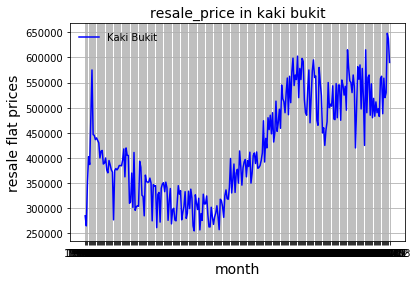

In [175]:
plt.plot(kaki_bukit1.groupby('month').resale_price.median(), label= 'Kaki Bukit', color='blue')

plt.title('resale_price in kaki bukit', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

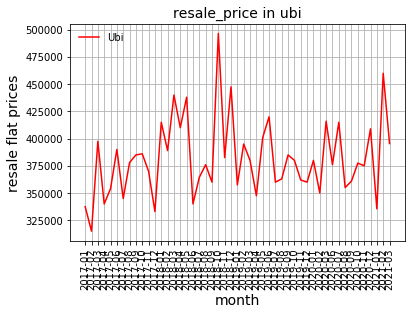

In [164]:
# Let's find out the trend of resale 4-room flat prices of Ubi and Kaki Bukit, from 2017 onwards

# Get the dataset for resale 4-room flats in Ubi and Kaki Bukit from 2017 onwards

df60 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

# Ubi resale 4-room flats

df61 = df60[df60['street_name']=='UBI AVE 1']

ubi2 = df61[['month',  'resale_price']]

ubi2.groupby('month').resale_price.median()

# Kaki Bukit resale 4-room flats

df62 = df60[df60['street_name']=='JLN TENAGA']

kaki_bukit2 = df62[['month',  'resale_price']]

kaki_bukit2.groupby('month').resale_price.median()

# Plot line graph to show the trend of resale prices in Ubi and Kaki Bukit

plt.plot(ubi2.groupby('month').resale_price.median(), label= 'Ubi', color='red')
plt.title('resale_price in ubi', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()

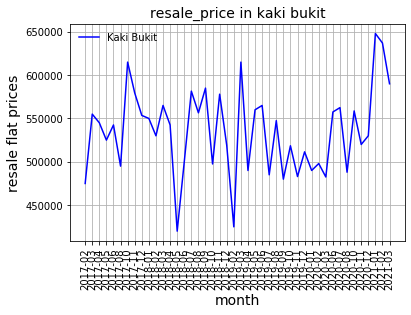

In [165]:
plt.plot(kaki_bukit2.groupby('month').resale_price.median(), label= 'Kaki Bukit', color='blue')

plt.title('resale_price in kaki bukit', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('resale flat prices', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(loc='upper left', frameon=False)
plt.show()